In [192]:
import numpy as np
from numpy import pi, sqrt
import matplotlib.pyplot as plt
import pennylane as qml

dev = qml.device("default.qubit", wires=3)

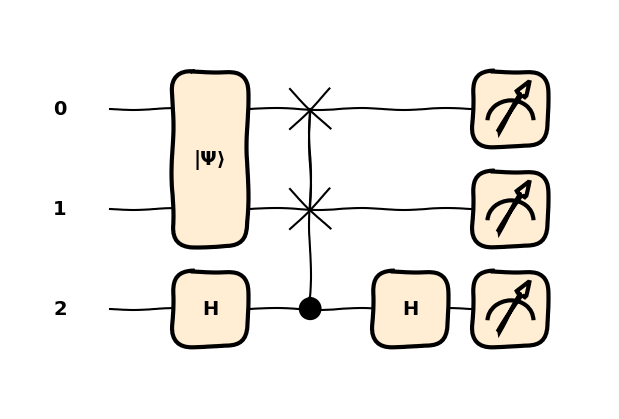

In [193]:
@qml.qnode(dev)
def qfunc(states = [1.,0.,0.,0.]):
    
    qml.StatePrep(states, wires=[0,1])
    
    # =========================
    # Information distillation
    # =========================

    #qml.CRY(np.pi/2,[0,1])
    qml.Hadamard(2)
    qml.CSWAP([2,1,0])
    qml.Hadamard(2)

    #qml.Hadamard([0])

    return qml.sample()

circuit = qml.QNode(qfunc, dev)
qml.draw_mpl(circuit, style="sketch")()
plt.show()

In [194]:
N = 2000
n_shots = 1

StateDict = {
    "H" : [1., 0.],
    "V" : [0., 1.],
    "D" : [ 1/sqrt(2), 1/sqrt(2)],
    "A" : [ 1/sqrt(2),-1/sqrt(2)],
    "L" : [ 1/sqrt(2), 1j/sqrt(2)],
    "R" : [ 1/sqrt(2),-1j/sqrt(2)],
}

boxA = ["H"]*N + ["V"]*N
#boxA = ["H","V"]*N
boxA = [StateDict[x] for x in boxA]

boxB = ["D"]*N + ["A"]*N
boxB = [StateDict[x] for x in boxB]

# Box A simulation

In [195]:
np.random.shuffle(boxA)
boxAstates = np.array([np.kron(x,y) for x,y in zip(boxA[::2],boxA[1::2])])
samplesA = circuit(boxAstates, shots=n_shots)
samplesA = [str(x) for x in samplesA]

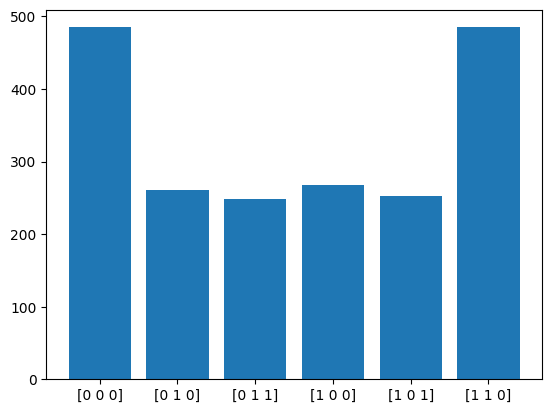

In [196]:
plt.bar(*np.unique(samplesA, return_counts=True))
plt.show()

# Box B simulation

In [197]:
np.random.shuffle(boxB)
boxBstates = np.array([np.kron(x,y) for x,y in zip(boxB[::2],boxB[1::2])])
samplesB = circuit(boxBstates, shots=n_shots)
samplesB = [str(x) for x in samplesB]

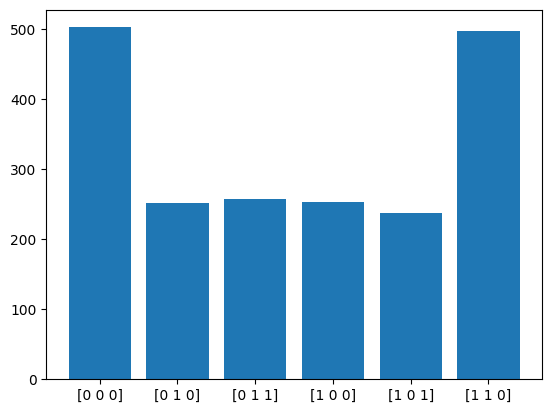

In [198]:
plt.bar(*np.unique(samplesB, return_counts=True))
plt.show()